# Exploration of L3 CALIOP Data
------------------------------------------------

Sylvie Dagoret-Campagne

- creation : Thursday 21 April 2016
- update : Friday 23 September 2016


In [658]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [659]:
import os

import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py


In [660]:
from astropy import units as u
from astropy.coordinates import SkyCoord

## 1) Hdf5 with h5py
-------------------------

### 1.1 Setting the path to the data
--------------------------------

In [661]:
#path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5'
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5'

In [662]:
print(path)

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5


### 1.2 Getting the list of the files
------------------------------

In [663]:
h5_files = [f for f in os.listdir(path) if f.endswith('.h5')]  
print(h5_files)
full_h5file=h5_files
ix=0
for file in h5_files:
    fname = os.path.join(path, file)
    full_h5file[ix]=fname
    ix=ix+1    
print full_h5file[0]

['CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-01D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-01N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-03D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-03N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-04D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-04N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-05D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-05N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-06D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-06N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-07D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-07N.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-08D.h5', 'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-08N.h5']
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CALIPSODATA2016/CAL_LID_L3_APro_AllSky-Standard-V3-00/2016/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-01D.h5


### 1.3 Select a given file

In [664]:
fileindex=11 # selecting the file to open : July 2016 night

In [665]:
h5f = h5py.File(full_h5file[fileindex], "r")  # file on which one works

In [666]:
print h5f

<HDF5 file "CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-07N.h5" (mode r)>


In [667]:
sel_filename=os.path.basename(h5_files[fileindex])
sel_filename

'CAL_LID_L3_APro_AllSky-Standard-V3-00.2016-07N.h5'

In [668]:
sel_filename_array=sel_filename.split('.')
print sel_filename_array[0], sel_filename_array[1]

CAL_LID_L3_APro_AllSky-Standard-V3-00 2016-07N


In [669]:
figfilename=sel_filename_array[0]+'_'+ sel_filename_array[1]+".pdf"
print figfilename

CAL_LID_L3_APro_AllSky-Standard-V3-00_2016-07N.pdf


In [670]:
pp = PdfPages(figfilename)

### 1.4 Data analysis
----------------------

#### 1.4.1 list of quantities to analyse

In [671]:
h5f.keys() # show the list of data tables

[u'AOD_63_Percent_Below',
 u'AOD_90_Percent_Below',
 u'AOD_Mean',
 u'AOD_Mean_Dust',
 u'AOD_Mean_Polluted_Dust',
 u'AOD_Mean_Smoke',
 u'Aerosol_Type',
 u'Altitude_Midpoint',
 u'Days_Of_Month_Observed',
 u'Extinction_532_Mean',
 u'Extinction_532_Mean_Dust',
 u'Extinction_532_Mean_Polluted_Dust',
 u'Extinction_532_Mean_Smoke',
 u'Extinction_532_Percentiles',
 u'Extinction_532_Standard_Deviation',
 u'Extinction_532_Standard_Deviation_Dust',
 u'Extinction_532_Standard_Deviation_Polluted_Dust',
 u'Extinction_532_Standard_Deviation_Smoke',
 u'Highest_Aerosol_Layer_Detected',
 u'Highest_Aerosol_Layer_Detected_Dust',
 u'Highest_Aerosol_Layer_Detected_Polluted_Dust',
 u'Highest_Aerosol_Layer_Detected_Smoke',
 u'Initial_Aerosol_Lidar_Ratio_532',
 u'Initial_Aerosol_Lidar_Ratio_Uncertainty_532',
 u'Land_Samples',
 u'Latitude_Midpoint',
 u'Layer_Separation_Maximum',
 u'Layer_Separation_Maximum_Dust',
 u'Layer_Separation_Maximum_Polluted_Dust',
 u'Layer_Separation_Maximum_Smoke',
 u'Layer_Separation

### Location of the OHP site

In [672]:
#OHP site
Longitude_ohp = 5.0+42./60.+44./3600. # deg
Latitude_ohp = 43.0+55./60.+54./3600. #deg
Altitude_ohp = 650.0#m

In [673]:
print Longitude_ohp 
print Latitude_ohp 
print Altitude_ohp

5.71222222222
43.9316666667
650.0


In [674]:
longlat = SkyCoord('5h42m44s', '+43d55m54s', frame='icrs')

In [675]:
longlat

<SkyCoord (ICRS): (ra, dec) in deg
    (85.68333333, 43.93166667)>

#### 1.4.2 Analysis of Aerosol Optical Depth
--------------------------------------

In [676]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude

In [677]:
bin_longitude=360./70.    # bins of longitude 5 deg 
print("bin_longitude=",bin_longitude)

('bin_longitude=', 5.142857142857143)


In [678]:
bin_latitude=180./85.     # bins of latitude 2 deg
print("bin_latitude=",bin_latitude)

('bin_latitude=', 2.1176470588235294)


In [679]:
aod_shape=aod_mean.shape

In [680]:
arr=np.zeros(aod_shape)    # create a numpy zero filled array

In [681]:
arr=np.array(aod_mean)     # the array contains data form HDF5 table

In [682]:
flags=np.logical_and(arr>0,arr<1)   # flags where the data are correct

In [683]:
aod_clean=np.where(np.logical_and(arr>0,arr<1),arr  , 0 )  # clean the aod from creazy data

In [684]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)

In [685]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)

In [686]:
all_longitude=longitude[0,:]    # coordinates for X

In [687]:
all_latitude=latitude[0,:]      # coordinate for Y

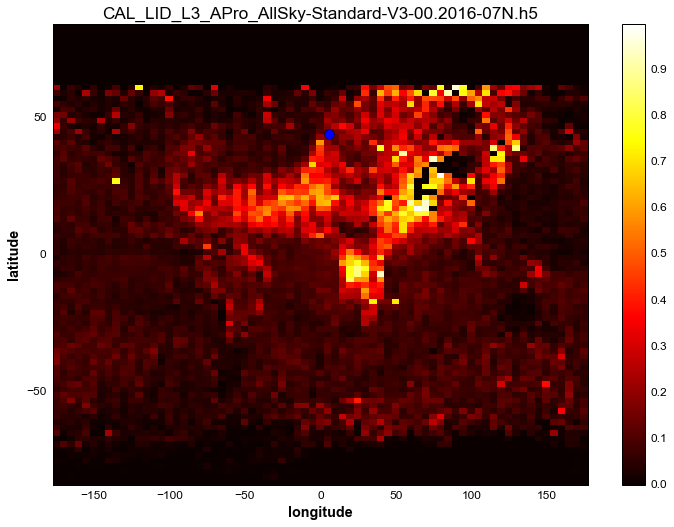

In [688]:
plt.figure(figsize=(12,8))
X,Y=np.meshgrid(all_longitude,all_latitude)
im = plt.pcolormesh(X,Y,aod_clean, cmap='hot')
plt.colorbar(im, orientation='vertical')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot([Longitude_ohp],[Latitude_ohp],'bo',markersize=10)
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

##### Using basemap

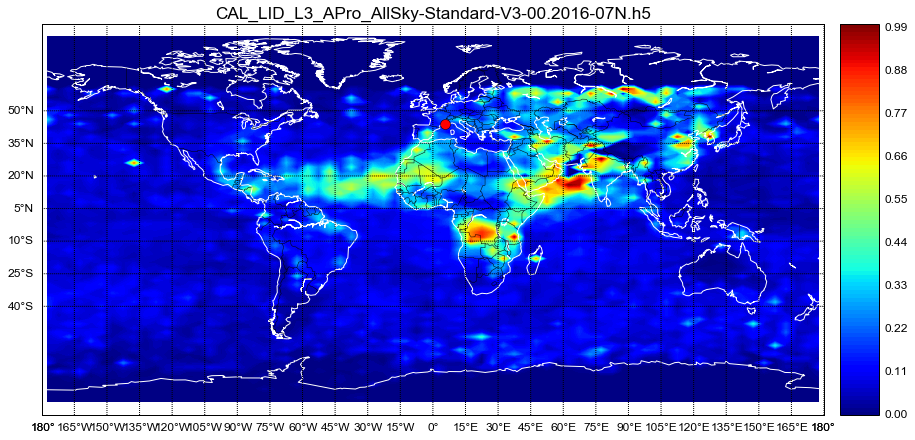

In [689]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
img=map.contourf(X, Y, aod_clean,100)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
map.plot(xpt_ohp,ypt_ohp,marker='o',color='r',markersize=10)  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

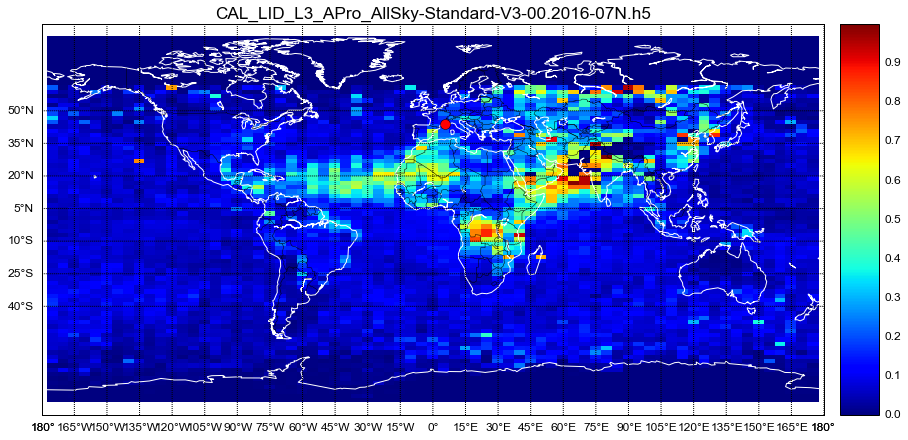

In [690]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
#img=map.contourf(X, Y, aod_clean,100)
img = plt.pcolormesh(X,Y,aod_clean)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
map.plot(xpt_ohp,ypt_ohp,'ro',markersize=10)  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

#### South America
-----------------

In [691]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m

#CTIO Site
Longitude_ctio = -70.815 # deg
Latitude_ctio = -30.165277777777778 #deg
Altitude_ctio = 2214.9999999993697 #m

# Cerro Paranal
Longitude_paranal = -70.40300000000002 #deg
Latitude_paranal  = -24.625199999999996 #deg
Altitude_paranal = 2635.0000000009704 #m

# Observatoire de Haute Provence

Longitude_ohp=5.71222222222
Latitude_ohp=43.9316666667
Altitude_ohp=650.

#### define europe

- longitude -10 to 60°
- latitude 30° to 60°

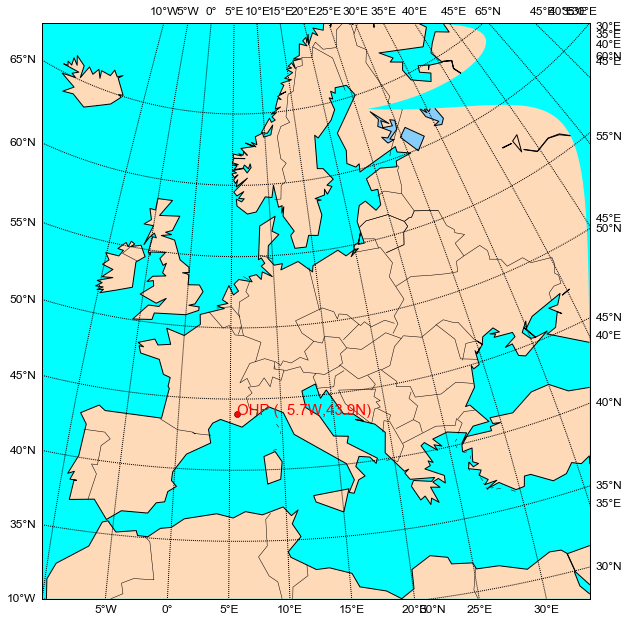

In [692]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

map = Basemap(llcrnrlon=-10,llcrnrlat=30,urcrnrlon=60.,urcrnrlat=60., projection='tmerc', lat_0 = 44, lon_0 = 5.7)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='peachpuff',lake_color='lightskyblue')
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(30,70,5.),labels=[True,True,True,True])
map.drawmeridians(np.arange(-10.,60.,5.),labels=[True,True,True,True])

xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_ohp,ypt_ohp,'ro')  # plot a red dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt_ohp-500,ypt_ohp-500,'OHP (%5.1fW,%3.1fN)' % (Longitude_ohp,Latitude_ohp),color='red', fontsize=15)
plt.savefig(pp, format='pdf')
plt.show()

### Region and Data selection for Europe

In [693]:
LongMin=-10
LongMax=60
LatMin=30
LatMax=60

In [694]:
flags_long=np.logical_and(X>=LongMin, X<=LongMax)   # flags in X where are the selected longitudes
flags_lat=np.logical_and(Y>=LatMin, Y<=LatMax)      # flags in Y where are the selected longitudes
flags_longlat=np.logical_and(flags_long,flags_lat)  # flags where the region is selected in the long-lat matrix
selected_long_indexes=np.where(np.logical_and(all_longitude>=LongMin, all_longitude<=LongMax))
selected_lat_indexes=np.where(np.logical_and(all_latitude>=LatMin, all_latitude<=LatMax))
selected_long=all_longitude[selected_long_indexes] # all selected longitudes
selected_lat=all_latitude[selected_lat_indexes]    # all selected latitudes
min_long_index=np.min(selected_long_indexes)
max_long_index=np.max(selected_long_indexes)
min_lat_index=np.min(selected_lat_indexes)
max_lat_index=np.max(selected_lat_indexes)
#extracted_aod=aod_clean[seletected_lat_indexes,selected_long_indexes]
extracted_aod=aod_clean[min_lat_index:max_lat_index,min_long_index:max_long_index] # extract the aod data

In [695]:
# check what has been done
print('selected_long_indexes=',selected_long_indexes)
print('selected_lat_indexes=',selected_lat_indexes)
print('selected_long=',selected_long)
print('selected_lat=',selected_lat)
print("flags_longlat.shape=",flags_longlat.shape)
print("flags_long.shape=",flags_long.shape)
print("flags_lat.shape=",flags_lat.shape)
print("total number of ll bins",flags_longlat.shape[0]*flags_longlat.shape[1])
print("min_long_index=",min_long_index)
print("max_long_index=",max_long_index)
print("min_lat_index=",min_lat_index)
print("max_lat_index=",max_lat_index)
print("extracted_aod.shape=",extracted_aod.shape)
print("extracted_aod.size=",extracted_aod.shape[0]*extracted_aod.shape[1])
#print("extracted_aod=",extracted_aod)

('selected_long_indexes=', (array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),))
('selected_lat_indexes=', (array([57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]),))
('selected_long=', array([ -7.5,  -2.5,   2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,
        37.5,  42.5,  47.5,  52.5,  57.5], dtype=float32))
('selected_lat=', array([ 30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,
        52.,  54.,  56.,  58.,  60.], dtype=float32))
('flags_longlat.shape=', (85, 72))
('flags_long.shape=', (85, 72))
('flags_lat.shape=', (85, 72))
('total number of ll bins', 6120)
('min_long_index=', 34)
('max_long_index=', 47)
('min_lat_index=', 57)
('max_lat_index=', 72)
('extracted_aod.shape=', (15, 13))
('extracted_aod.size=', 195)


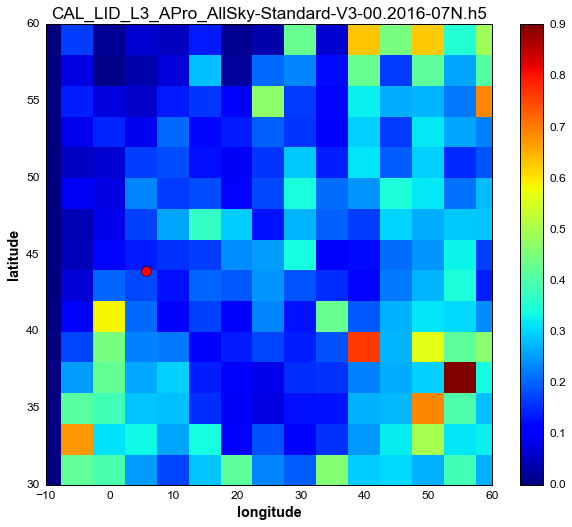

In [696]:
plt.figure(figsize=(10,8))
newdata=np.where(flags_longlat,aod_clean  , 0 )  # clean the aod from creazy data
#image = plt.pcolormesh(X,Y,newdata, cmap='hot')
image = plt.pcolormesh(X,Y,newdata)
plt.xlim(LongMin,LongMax)
plt.ylim(LatMin,LatMax)
plt.plot([Longitude_ohp],[Latitude_ohp],'ro',markersize=10)
plt.xlabel('longitude')
plt.ylabel('latitude')
title=sel_filename
plt.title(title)
plt.colorbar(image, orientation='vertical')

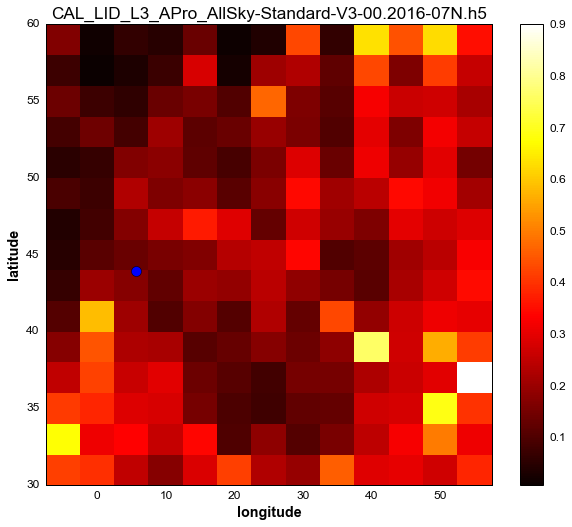

In [697]:
plt.figure(figsize=(10,8))
Xsel,Ysel=np.meshgrid(selected_long,selected_lat)
im = plt.pcolormesh(Xsel,Ysel,extracted_aod, cmap='hot')
plt.colorbar(im, orientation='vertical')
plt.axis([Xsel.min(), Xsel.max(), Ysel.min(), Ysel.max()])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot([Longitude_ohp],[Latitude_ohp],marker='o',color='b',markersize=10)
#title="Aerosol Optical Depth AOD above europe"
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

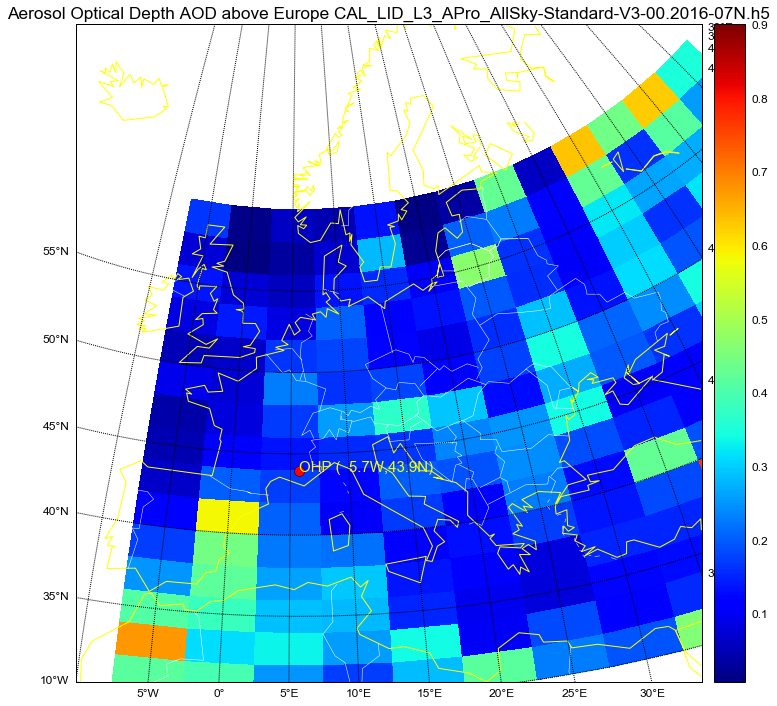

In [698]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Latitude_ohp, lon_0 = Longitude_ohp)
#map.drawmapboundary(fill_color='aqua') # No fill color
#map.fillcontinents(color='peachpuff',lake_color='lightskyblue') # No fill color
xpt_lsst,ypt_lsst = map(Longitude_ohp,Latitude_ohp)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_ohp,ypt_ohp,'ro')  # plot a red dot there

img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',latlon=True)
#img=map.contourf(Xsel, Ysel, extracted_aod,100)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(LatMin,LatMax,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(LongMin,LongMax,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
map.plot(xpt_ohp,ypt_ohp,'ro',markersize=10)  # plot a red dot there
plt.text(xpt_ohp-1000,ypt_ohp-1000,'OHP (%5.1fW,%3.1fN)' % (Longitude_ohp,Latitude_ohp),color='yellow', fontsize=15)
title="Aerosol Optical Depth AOD above Europe " + sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

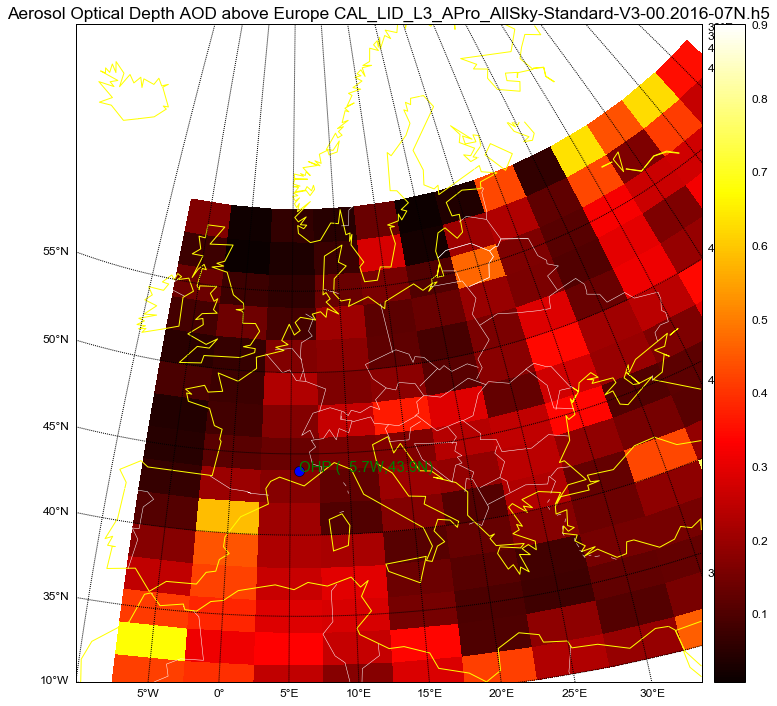

In [699]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Latitude_ohp, lon_0 = Longitude_ohp)
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_ohp,ypt_ohp,'ro')  # plot a red dot there
img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',cmap="hot",latlon=True)
#img=map.contourf(Xsel, Ysel, extracted_aod,20)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(LatMin,LatMax,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(LongMin,LongMax,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
xpt_ohp,ypt_ohp = map(Longitude_ohp,Latitude_ohp)
map.plot(xpt_ohp,ypt_ohp,'bo',markersize=10)  # plot a red dot there
plt.text(xpt_ohp-1000,ypt_ohp-1000,'OHP (%5.1fW,%3.1fN)' % (Longitude_ohp,Latitude_ohp),color='green', fontsize=15)
title="Aerosol Optical Depth AOD above Europe "+sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

#### Find AOD data for OHP site
------------------------------

In [700]:
ohp_long_indexes=np.where(np.logical_and(all_longitude>=Longitude_ohp-2.5, all_longitude<=Longitude_ohp+2.5))
ohp_lat_indexes=np.where(np.logical_and(all_latitude>=Latitude_ohp-1, all_latitude<=Latitude_ohp+1))

In [701]:
print('ohp_long_indexes=',ohp_long_indexes)
print('ohp_lat_indexes=',ohp_lat_indexes)
print('ohp_aod = ',aod_clean[ohp_lat_indexes[0],ohp_long_indexes[0]][0])

('ohp_long_indexes=', (array([37]),))
('ohp_lat_indexes=', (array([64]),))
('ohp_aod = ', 0.15727603)


### Find distance of OHP box

In [702]:
#distance along longitude
x1,y1 = map(Longitude_ohp-2.5,Latitude_ohp)
x2,y2 = map(Longitude_ohp+2.5,Latitude_ohp)
d_long=np.sqrt((x2-x1)**2+(y2-y1)**2)/1000

In [703]:
print x1,x2,y1,y2
print d_long

1324797.52131 1726293.41513 1442880.35746 1442880.35746
401.495893822


In [704]:
#distance along latitude
x1,y1 = map(Longitude_ohp,Latitude_ohp-1)
x2,y2 = map(Longitude_ohp,Latitude_ohp+1)
d_lat=np.sqrt((x2-x1)**2+(y2-y1)**2)/1000

In [705]:
print x1,x2,y1,y2
print d_lat

1525545.46822 1525545.46822 1328739.62137 1550961.44763
222.221826261


### Close file of figures

In [706]:
pp.close()

### Count other things

('np.count_nonzero(flags_longlat)=', 224)
('flags_longlat.shape=', (85, 72))


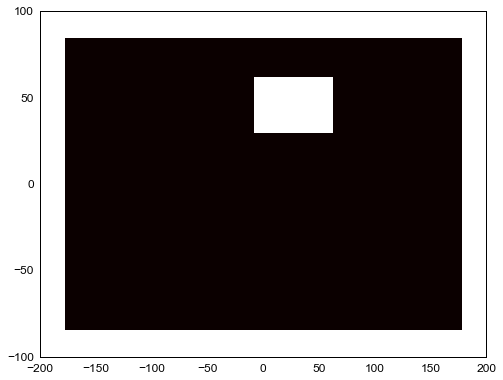

In [707]:
print("np.count_nonzero(flags_longlat)=",np.count_nonzero(flags_longlat))
print("flags_longlat.shape=",flags_longlat.shape)
image = plt.pcolormesh(X,Y,flags_longlat, cmap='hot')

('np.count_nonzero(flags_long)=', 1190)
('flags_long.shape=', (85, 72))


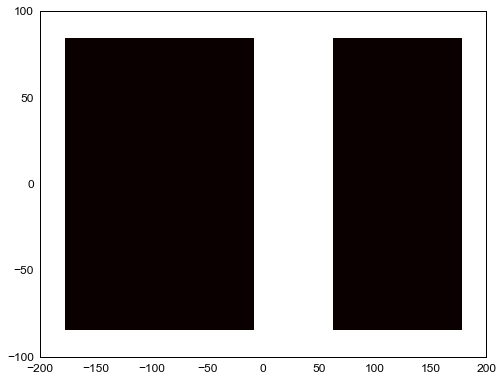

In [708]:
print("np.count_nonzero(flags_long)=",np.count_nonzero(flags_long))
print("flags_long.shape=",flags_long.shape)
image = plt.pcolormesh(X,Y,flags_long, cmap='hot')

('np.count_nonzero(flags_lat)=', 1152)
('flags_lat.shape=', (85, 72))


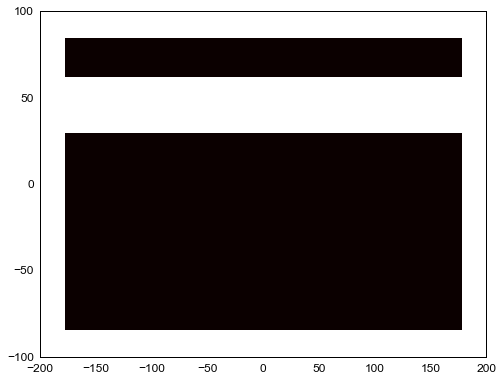

In [709]:
print("np.count_nonzero(flags_lat)=",np.count_nonzero(flags_lat))
print("flags_lat.shape=",flags_lat.shape)
image = plt.pcolormesh(X,Y,flags_lat, cmap='hot')